In [1]:
import numpy as np
from astropy.table import Table
import astropy.constants
from scipy import spatial
import matplotlib.pyplot as plt

In [2]:
def read_marilena(file, setnum):
    return np.loadtxt(file)[setnum*16:setnum*16+16, :]

In [3]:
ml_txt='../bp_values_height_new.txt'
ml_data=read_marilena(ml_txt,2)

In [4]:
ml_coords=ml_data[:, 5:7]
ml_height=(ml_data[:, 2]*6.95508e8 - astropy.constants.R_sun.value)/1e6

In [5]:
det_catalog='../EvtCatalog.fits'
det_table=Table.read(det_catalog)

In [76]:
x_det = det_table['x_image']
y_det = det_table['y_image']
height_det = (det_table['height']- astropy.constants.R_sun.value)/1e6
t_det = det_table['tmax']
det_table.add_column(height_det,name='det_height_Mm')

In [7]:
tree_det=spatial.KDTree(np.array([x_det,y_det]).T)

In [8]:
dist,idx = tree_det.query(ml_coords)

In [78]:
det_table[idx]

<Table length=16>
   xc      yc      tc   ... corrcoeff       LOSdist         det_height_Mm   
float64 float64 float64 ...  float32        float64            float64      
------- ------- ------- ... ---------- ------------------ ------------------
  405.5  2084.5     4.0 ... 0.70848143 210577.45319363952 3.1754772493224146
  654.0  2072.0     4.5 ...   0.760347 365064.60305452906  1.360979158511162
  227.0  1557.5     3.0 ... 0.81394327 212823.05949712297 0.9990691201900244
  185.0  1578.5     9.5 ...  0.7650222    91793.428060368 1.2612835079351663
  742.0  1536.5     4.0 ...  0.5045041  88259.12657617779 1.6046974261012077
  953.0  1606.5     8.5 ...  0.5718309  466007.6946341282 3.2140045390491485
  612.5  1071.0    46.5 ... 0.80962324 496179.49260942335 2.8185611802253723
  526.5   470.5    49.5 ...  0.6340041 316884.49145181617  0.652376804332018
 1368.5  1689.0    33.0 ...  0.7659298  124467.9873546007 1.8759274611057044
 1267.0  1601.5     2.0 ...  0.7958185 162634.95876014326 2.2844803930449484
 1286.0  1578.5     7.0 ...  0.7251297  52756.29224013791 2.9300787493805887
 1266.5  1530.5    34.5 ...  0.7210144  288619.4068930632 2.4435352870802878
 1404.5  1570.0     2.5 ... 0.61941034 23124.643946920452  2.538321483984947
 2300.0  1041.5    34.5 ...  0.8720772  8407.576469591279  2.611911935619354
 1873.5   507.5    44.5 ...  0.3609317  721383.1848350272  2.364370466547012
 1687.0   522.0     2.5 ...  0.7163288 177621.52838686848  3.905615473865032

In [10]:
dist

array([ 2.35923812,  0.60232757,  0.54127035,  1.46269389,  0.58795841,
        0.33381191, 40.83440498,  2.54209909,  0.87914287,  0.78418767,
        5.14276054,  0.59151062,  0.41028426,  2.12911735,  1.60957372,
        0.65357592])

In [11]:
dist_max=3

distOK=dist<dist_max

det_OK = det_table[idx[distOK]]
height_det_OK = height_det[idx[distOK]]

ml_height_OK = ml_height[dist<dist_max]

In [12]:
plt.scatter(ml_height_OK,height_det_OK,c=dist[distOK])
plt.plot([1,5],[1,5])
plt.plot([1,5],[2,6],'--')

In [13]:
det_correl_OK=det_OK['corrcoeff']

plt.scatter(ml_height_OK,height_det_OK,c=det_correl_OK,cmap='winter')
plt.plot([1,5],[1,5])
plt.plot([1,5],[2,6],'--')

In [14]:
det_OK = det_table[idx[distOK]]
det_OK.add_column(ml_height_OK,name='ml_height')

In [15]:
det_OK

<Table length=14>
   xc      yc      tc   ...     ml_height        det_height_Mm   
float64 float64 float64 ...      float64            float64      
------- ------- ------- ... ------------------ ------------------
  405.5  2084.5     4.0 ... 2.9516961600000857 3.1754772493224146
  654.0  2072.0     4.5 ... 1.5815454000000955  1.360979158511162
  227.0  1557.5     3.0 ...  1.365937919999957 0.9990691201900244
  185.0  1578.5     9.5 ... 2.0962213200000526 1.2612835079351663
  742.0  1536.5     4.0 ... 1.6093657200000286 1.6046974261012077
  953.0  1606.5     8.5 ... 1.4702641199998856 3.2140045390491485
  526.5   470.5    49.5 ... 1.4215785600000619  0.652376804332018
 1368.5  1689.0    33.0 ...  2.151861960000038 1.8759274611057044
 1267.0  1601.5     2.0 ...           2.590032 2.2844803930449484
 1266.5  1530.5    34.5 ... 2.4509303999999763 2.4435352870802878
 1404.5  1570.0     2.5 ...           2.937786  2.538321483984947
 2300.0  1041.5    34.5 ...  3.160348560000062  2.611911935619354
 1873.5   507.5    44.5 ...  3.591563519999981  2.364370466547012
 1687.0   522.0     2.5 ...  4.287071519999981  3.905615473865032

## Le point bleu en haut à gauche correspond dans le catalogue à 2 pixels projetés et à 1 seul pas de temps!

In [16]:
det_OK[(det_OK['ml_height']<2) & (height_det_OK>3.5) ]

<Table length=0>
   xc      yc      tc   projected_area ... LOSdist ml_height det_height_Mm
float64 float64 float64     int64      ... float64  float64     float64   
------- ------- ------- -------------- ... ------- --------- -------------

In [17]:
tree_det_witht=spatial.KDTree(np.array([x_det,y_det,t_det]).T)

In [18]:
ml_coords_t=ml_data[:, 5:7]
ml_coords.shape

(16, 2)

In [19]:
ml_coords_t=np.hstack([ml_coords,2*np.ones((1,16)).T])

In [20]:
tdist,tidx = tree_det_witht.query(ml_coords_t)

In [21]:
tdist

array([ 3.81654353,  0.60232757,  0.54127035,  5.6746165 ,  2.08463308,
        0.81343246, 45.24549393,  5.85685108, 10.68943511,  1.27080695,
       11.24490933,  5.31511752,  0.41028426,  5.99515196, 19.2232807 ,
        0.65357592])

In [22]:
tdist_max=6

tdistOK=tdist<tdist_max

tdet_OK = det_table[tidx[tdistOK]]
theight_det_OK = height_det[tidx[tdistOK]]

tml_height_OK = ml_height[tdist<tdist_max]

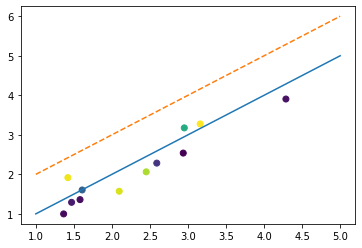

In [23]:
plt.scatter(tml_height_OK,theight_det_OK,c=tdist[tdistOK])
plt.plot([1,5],[1,5])
plt.plot([1,5],[2,6],'--')

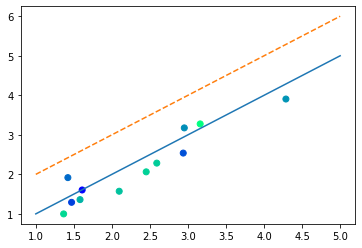

In [24]:
plt.scatter(tml_height_OK,theight_det_OK,c=tdet_OK['corrcoeff'],cmap='winter')
plt.plot([1,5],[1,5])
plt.plot([1,5],[2,6],'--')

In [25]:
plt.scatter(tml_height_OK, - tml_height_OK + theight_det_OK,c=tdet_OK['corrcoeff'],cmap='winter')

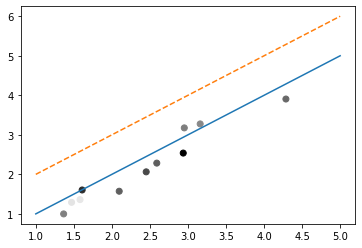

In [26]:
plt.scatter(tml_height_OK,theight_det_OK,c=tdet_OK['LOSdist'],cmap='gray')
plt.plot([1,5],[1,5])
plt.plot([1,5],[2,6],'--')

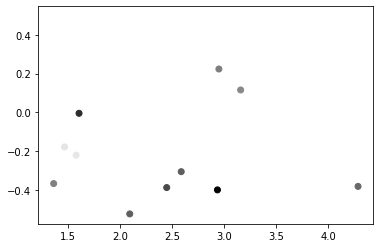

In [27]:
plt.scatter(tml_height_OK,theight_det_OK - tml_height_OK,c=tdet_OK['LOSdist'],cmap='gray')

(array([ 0.,  2.,  2., 10., 14., 12., 20., 27., 36., 48., 39., 44., 45.,
        43., 37., 42., 30., 27., 24., 15., 11., 12.,  7.,  9.,  9.,  6.,
         6.,  1.,  0.,  0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. ]),
 <a list of 30 Patch objects>)

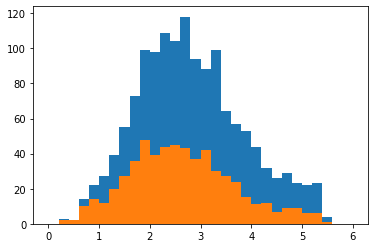

In [33]:
plt.hist(height_det,bins=30,range=[0,6])
plt.hist(height_det[det_table['duration']>1],bins=30,range=[0,6])

(array([  0.,   0.,   0.,   0.,   0.,   1.,   3.,   2.,   4.,   8.,   5.,
          6.,   9.,  16.,  13.,  18.,  17.,  18.,  28.,  26.,  41.,  57.,
         46.,  52.,  68.,  68.,  73.,  87., 106.,  85.,  91., 123.,  99.,
         87.,  81.,  51.,  26.,   6.,   0.,   0.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ], dtype=float32),
 <a list of 40 Patch objects>)

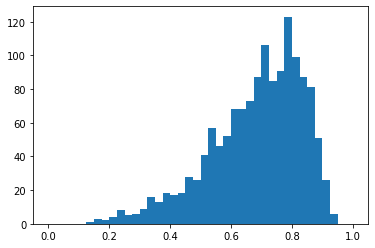

In [39]:
plt.hist(det_table['corrcoeff'],bins=40,range=[0,1])

(array([ 0.,  1.,  1.,  6.,  7.,  7., 14., 23., 30., 37., 33., 34., 37.,
        37., 29., 35., 26., 24., 20., 14.,  7.,  9.,  5.,  5.,  5.,  3.,
         4.,  1.,  0.,  0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. ]),
 <a list of 30 Patch objects>)

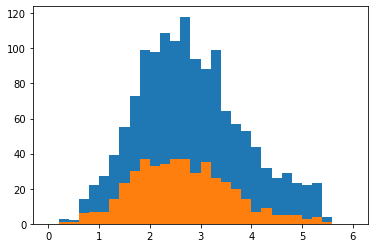

In [41]:
plt.hist(height_det,bins=30,range=[0,6])
plt.hist(height_det[(det_table['duration']>1) & (det_table['corrcoeff']>0.6)],bins=30,range=[0,6])

(array([252., 230., 212., 167., 135., 115.,  80.,  43.,  28.,  26.,  28.,
         16.,  16.,  12.,  11.,  21.,  13.,   8.,   2.,   6.]),
 array([1.47544415e-07, 1.23850529e-04, 2.47553513e-04, 3.71256497e-04,
        4.94959482e-04, 6.18662466e-04, 7.42365450e-04, 8.66068434e-04,
        9.89771419e-04, 1.11347440e-03, 1.23717739e-03, 1.36088037e-03,
        1.48458336e-03, 1.60828634e-03, 1.73198932e-03, 1.85569231e-03,
        1.97939529e-03, 2.10309828e-03, 2.22680126e-03, 2.35050425e-03,
        2.47420723e-03]),
 <a list of 20 Patch objects>)

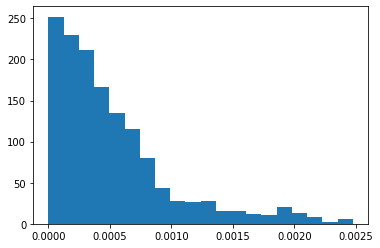

In [45]:
plt.hist((det_table['LOSdist']/astropy.constants.R_sun.value),bins=20)

(array([ 0.,  1.,  2.,  6., 10., 10., 19., 25., 33., 44., 34., 37., 41.,
        41., 33., 40., 30., 25., 19., 15.,  9., 10.,  5.,  9.,  6.,  6.,
         6.,  0.,  0.,  0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. ]),
 <a list of 30 Patch objects>)

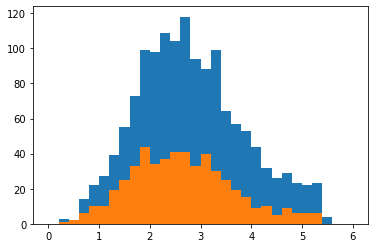

In [47]:
plt.hist(height_det,bins=30,range=[0,6])
plt.hist(height_det[(det_table['duration']>1) & (det_table['LOSdist']<0.001*astropy.constants.R_sun.value)],bins=30,range=[0,6])

(array([ 0.,  1.,  1.,  3.,  6.,  6., 14., 22., 28., 33., 29., 31., 35.,
        36., 26., 34., 26., 23., 17., 14.,  7.,  8.,  5.,  5.,  3.,  3.,
         4.,  0.,  0.,  0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. ]),
 <a list of 30 Patch objects>)

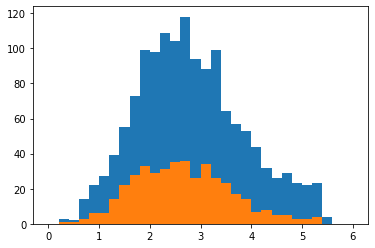

In [48]:
plt.hist(height_det,bins=30,range=[0,6])
plt.hist(height_det[(det_table['duration']>1) & 
                    (det_table['LOSdist']<0.001*astropy.constants.R_sun.value) &
                   (det_table['corrcoeff']>0.6)],bins=30,range=[0,6])

(array([ 1.,  2.,  7., 17., 42., 38., 41., 38., 31., 25., 11.,  5.,  2.,
         1.,  0.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. ]),
 <a list of 15 Patch objects>)

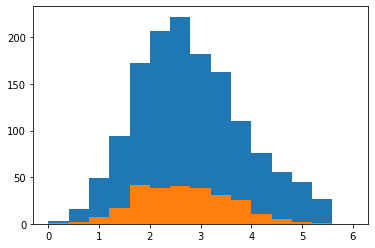

In [55]:
plt.hist(height_det,bins=15,range=[0,6])
plt.hist(height_det[(det_table['duration']>1) & 
                    (det_table['LOSdist']<0.0007*astropy.constants.R_sun.value) &
                   (det_table['corrcoeff']>0.7)],bins=15,range=[0,6])

In [63]:
plt.hist(height_det,bins=15,range=[0,6],density=True)
plt.hist(height_det[(det_table['duration']>2) & 
                    (det_table['LOSdist']<0.0007*astropy.constants.R_sun.value) &
                   (det_table['corrcoeff']>0.75)],bins=15,range=[0,6],density=True,alpha=0.5)

(array([0.0210084 , 0.0210084 , 0.08403361, 0.21008403, 0.44117647,
        0.39915966, 0.29411765, 0.33613445, 0.31512605, 0.23109244,
        0.08403361, 0.04201681, 0.        , 0.0210084 , 0.        ]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. ]),
 <a list of 15 Patch objects>)

In [69]:
plt.hist((det_table['volume'])**(1/3),bins=30,range=[1,5])

(array([475., 230.,   0.,  90.,  78.,  55.,  65.,  23.,  53.,  41.,  51.,
         17.,  23.,  19.,  20.,  24.,  22.,  17.,  11.,  13.,  12.,   9.,
          9.,  11.,   6.,   8.,   6.,   5.,   3.,   3.]),
 array([1.        , 1.13333333, 1.26666667, 1.4       , 1.53333333,
        1.66666667, 1.8       , 1.93333333, 2.06666667, 2.2       ,
        2.33333333, 2.46666667, 2.6       , 2.73333333, 2.86666667,
        3.        , 3.13333333, 3.26666667, 3.4       , 3.53333333,
        3.66666667, 3.8       , 3.93333333, 4.06666667, 4.2       ,
        4.33333333, 4.46666667, 4.6       , 4.73333333, 4.86666667,
        5.        ]),
 <a list of 30 Patch objects>)

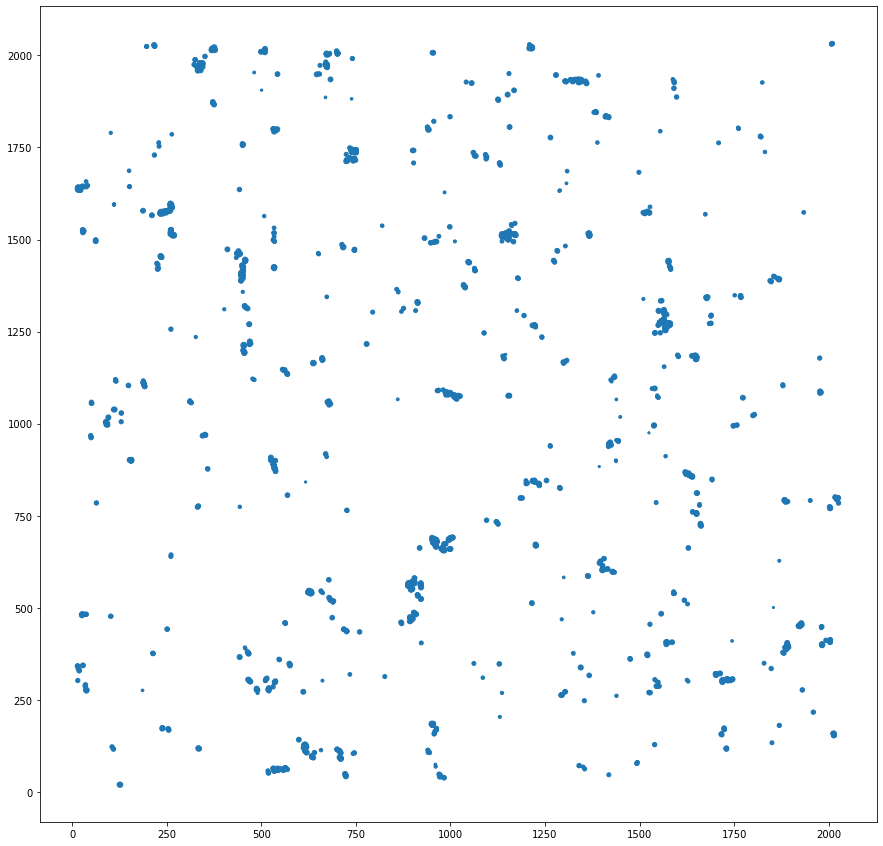

In [73]:
plt.figure(figsize=(15,15))
plt.scatter(det_table['x_image'],det_table['y_image'],s=det_table['corrcoeff']*30)

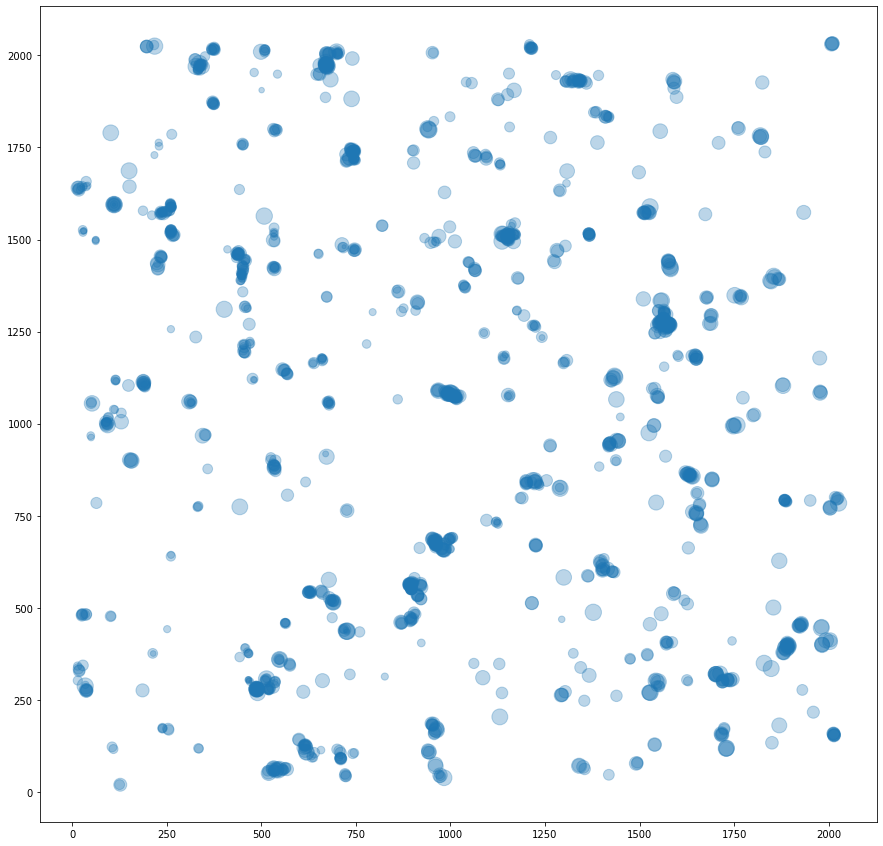

In [80]:
plt.figure(figsize=(15,15))
plt.scatter(det_table['x_image'],det_table['y_image'],s=det_table['det_height_Mm']*50,alpha=0.3)